# Crop Yield Predition

### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

### Reading CSV File 

In [2]:
df=pd.read_csv("Crop_yield.csv")
df

,State_Name,Crop_Year,Crop_Name,Season,Area,Production,Rainfall,Minimum Selling Price,Yield
0,Andaman and Nicobar Islands,2000,RICE,Kharif,10881.00,32184.00,1244.2,510.0,2.96
1,Andhra Pradesh,2000,RICE,Kharif,2565400.00,6436200.00,965.3,510.0,2.51
2,Arunachal Pradesh,2000,RICE,Kharif,124545.74,159860.30,1650.0,510.0,1.28
3,Assam,2000,RICE,Kharif,2525653.00,2255230.00,1666.6,510.0,0.89
4,Bihar,2000,RICE,Kharif,665467.00,945254.00,1047.7,510.0,1.42
...,...,...,...,...,...,...,...,...,...
491,Sikkim,2015,RICE,Kharif,12144.00,21340.00,1883.0,1410.0,1.76
492,Tamil Nadu,2015,RICE,Kharif,1493276.00,4050334.00,285.9,1410.0,2.71
493,Uttar Pradesh,2015,RICE,Kharif,5861282.00,14415939.00,436.1,1410.0,2.46
494,Uttarakhand,2015,RICE,Kharif,292147.87,611450.53,881.5,1410.0,2.09


In [3]:
df.groupby('State_Name')['State_Name'].agg('count')

State_Name
Andaman and Nicobar Islands    16
Andhra Pradesh                 16
Arunachal Pradesh              16
Assam                          16
Bihar                          16
Chandigarh                     16
Chhattisgarh                   16
Dadra and Nagar Haveli         16
Goa                            16
Gujarat                        16
Haryana                        16
Himachal Pradesh               16
Jammu and Kashmir              16
Jharkhand                      16
Karnataka                      16
Kerala                         16
Madhya Pradesh                 15
Madhya Pradresh                 1
Maharashtra                    16
Manipur                        16
Meghalaya                      16
Mizoram                        16
Nagaland                       16
Odisha                         16
Puducherry                     16
Punjab                         16
Rajasthan                      16
Sikkim                         16
Tamil Nadu                     16
Utt

### Selecting necessary Features

In [4]:
df1=df.drop(['Crop_Name','Season','Minimum Selling Price','Yield'],axis="columns")
df1

,State_Name,Crop_Year,Area,Production,Rainfall
0,Andaman and Nicobar Islands,2000,10881.00,32184.00,1244.2
1,Andhra Pradesh,2000,2565400.00,6436200.00,965.3
2,Arunachal Pradesh,2000,124545.74,159860.30,1650.0
3,Assam,2000,2525653.00,2255230.00,1666.6
4,Bihar,2000,665467.00,945254.00,1047.7
...,...,...,...,...,...
491,Sikkim,2015,12144.00,21340.00,1883.0
492,Tamil Nadu,2015,1493276.00,4050334.00,285.9
493,Uttar Pradesh,2015,5861282.00,14415939.00,436.1
494,Uttarakhand,2015,292147.87,611450.53,881.5


### Handling Null Values

In [5]:
df1.isnull().sum()

State_Name    0
Crop_Year     0
Area          0
Production    3
Rainfall      2
dtype: int64

In [6]:
df2=df1.dropna()
df2

,State_Name,Crop_Year,Area,Production,Rainfall
0,Andaman and Nicobar Islands,2000,10881.00,32184.00,1244.2
1,Andhra Pradesh,2000,2565400.00,6436200.00,965.3
2,Arunachal Pradesh,2000,124545.74,159860.30,1650.0
3,Assam,2000,2525653.00,2255230.00,1666.6
4,Bihar,2000,665467.00,945254.00,1047.7
...,...,...,...,...,...
491,Sikkim,2015,12144.00,21340.00,1883.0
492,Tamil Nadu,2015,1493276.00,4050334.00,285.9
493,Uttar Pradesh,2015,5861282.00,14415939.00,436.1
494,Uttarakhand,2015,292147.87,611450.53,881.5


### Analyzing the data

In [7]:
df2.describe()
import warnings
warnings.filterwarnings('ignore')

Text(0, 0.5, 'Production')

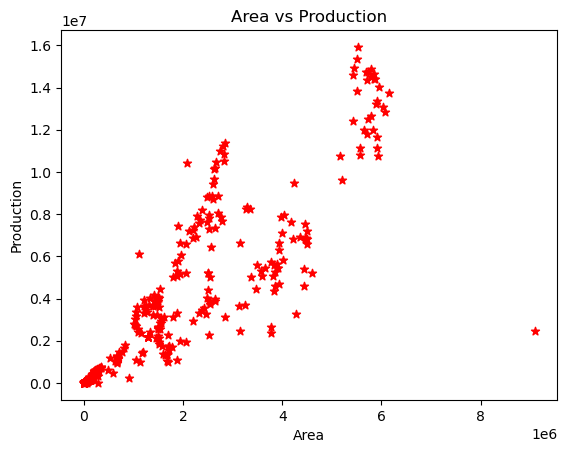

In [8]:
plt.scatter(df2.Area,df2.Production,c='red',marker='*')
plt.title('Area vs Production') 
plt.xlabel('Area')
plt.ylabel('Production') 

### Converting Categorical Data to Numerical Data 

In [9]:
df2

,State_Name,Crop_Year,Area,Production,Rainfall
0,Andaman and Nicobar Islands,2000,10881.00,32184.00,1244.2
1,Andhra Pradesh,2000,2565400.00,6436200.00,965.3
2,Arunachal Pradesh,2000,124545.74,159860.30,1650.0
3,Assam,2000,2525653.00,2255230.00,1666.6
4,Bihar,2000,665467.00,945254.00,1047.7
...,...,...,...,...,...
491,Sikkim,2015,12144.00,21340.00,1883.0
492,Tamil Nadu,2015,1493276.00,4050334.00,285.9
493,Uttar Pradesh,2015,5861282.00,14415939.00,436.1
494,Uttarakhand,2015,292147.87,611450.53,881.5


In [10]:
dummies=pd.get_dummies(df2.State_Name)
state_list=dummies.columns.tolist()

dummies=dummies.drop(['West Bengal'],axis='columns') # To Avoid Dummy variable trap
dummies

,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli,Goa,Gujarat,...,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Uttar Pradesh,Uttarakhand
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### Storing the list of States 


In [11]:
with open('states.txt','w') as f:
    f.write(str(state_list))

In [12]:
df3=pd.concat([df2,dummies],axis='columns')
df3

,State_Name,Crop_Year,Area,Production,Rainfall,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,...,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Uttar Pradesh,Uttarakhand
0,Andaman and Nicobar Islands,2000,10881.00,32184.00,1244.2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Andhra Pradesh,2000,2565400.00,6436200.00,965.3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Arunachal Pradesh,2000,124545.74,159860.30,1650.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Assam,2000,2525653.00,2255230.00,1666.6,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Bihar,2000,665467.00,945254.00,1047.7,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,Sikkim,2015,12144.00,21340.00,1883.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
492,Tamil Nadu,2015,1493276.00,4050334.00,285.9,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
493,Uttar Pradesh,2015,5861282.00,14415939.00,436.1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
494,Uttarakhand,2015,292147.87,611450.53,881.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
df3=df3.drop(['State_Name'],axis='columns')
df3.to_csv("Final_csv",index=False)
df3

,Crop_Year,Area,Production,Rainfall,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,...,Mizoram,Nagaland,Odisha,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Uttar Pradesh,Uttarakhand
0,2000,10881.00,32184.00,1244.2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,2565400.00,6436200.00,965.3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,124545.74,159860.30,1650.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,2525653.00,2255230.00,1666.6,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,665467.00,945254.00,1047.7,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,2015,12144.00,21340.00,1883.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
492,2015,1493276.00,4050334.00,285.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
493,2015,5861282.00,14415939.00,436.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
494,2015,292147.87,611450.53,881.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
X=df3.drop(['Production'],axis='columns')
Y=df3.Production

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

### Selecting appropriate alogorithm for better Result (K fold)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
LR=cross_val_score(LinearRegression(),x_train,y_train,cv=5)
Ridge=cross_val_score(Ridge(alpha=1.0),x_train,y_train,cv=5)
Lasso=cross_val_score(Lasso(alpha=1.0),x_train,y_train,cv=5)
Elastic=cross_val_score(ElasticNet(1.0),x_train,y_train,cv=5)
RF=cross_val_score(RandomForestRegressor(n_estimators = 100),x_train,y_train,cv=5)




In [19]:
print(f"Linear Regression values at K=5 is {LR} and mean is {round(LR.mean(),2)}")
print(f"Ridge Regression values at K=5 is {Ridge} and mean is {round(Ridge.mean(),2)}")
print(f"Lasso Regression values at K=5 is {Lasso} and mean is {round(Lasso.mean(),2)}")
print(f"Elastic Net Regression values at K=5 is {Elastic} and mean is {round(Elastic.mean(),2)}")
print(f"Random Forest Regressor values at K=5 is {RF} and mean is {round(RF.mean(),2)}")

Linear Regression values at K=5 is [0.80217714 0.96011102 0.91562473 0.84193302 0.96547857] and mean is 0.9
Ridge Regression values at K=5 is [0.73313019 0.94547077 0.91676867 0.93358483 0.96900548] and mean is 0.9
Lasso Regression values at K=5 is [0.79768976 0.96011426 0.91563122 0.84200176 0.96549255] and mean is 0.9
Elastic Net Regression values at K=5 is [0.69974146 0.8572096  0.80291786 0.78143775 0.94232898] and mean is 0.82
Random Forest Regressor values at K=5 is [0.88007153 0.9547583  0.9405541  0.92197731 0.97431502] and mean is 0.93


### Random Forest outperforms However, hyperparameter tuning may improve accuracy. ( GridSearchCV)

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = { "n_estimators" : [i for i in range(1,201)]}
grid = GridSearchCV(RandomForestRegressor(),param_grid, n_jobs=-1, cv=5)

grid.fit(x_train, y_train)

print(grid.best_score_ , grid.best_params_)

Estimator= grid.best_params_.get("n_estimators")

print(Estimator)

0.9401860180420842 {'n_estimators': 5}
5


### Got the Hyperparameter value for optimal results. We are able to construct models.

In [21]:
model=RandomForestRegressor(n_estimators=Estimator)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9766085266247206

In [22]:
y_pred=model.predict(x_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred) 

print(f"R2 score is {r2}")

R2 score is 0.9766085266247206


### Storing model in pickle file

In [23]:
import pickle 
with open('Yield_prediction.pickle','wb') as f:
    pickle.dump(model,f)

In [24]:
def yeild_predict(State,Crop_Year,Area,Rainfall):
    if(State==state_list[-1]):
        x = np.zeros(len(X.columns))
        x[0] = Crop_Year
        x[1] = Area
        x[2] = Rainfall
    else:
        loc_index = np.where(X.columns==State)[0][0]
        x = np.zeros(len(X.columns))
        x[0] = Crop_Year
        x[1] = Area
        x[2] = Rainfall
        if loc_index >= 0:
            x[loc_index] = 1

    return model.predict([x])[0]

In [26]:
state='Andaman and Nicobar Islands'
year=2000
area=10881.00
rainfall=1244.2
predicted = yeild_predict(state,year,area,rainfall)
yeild = predicted/area
print(f"Yeild is {round(yeild,2)} ton per hectare")

Yeild is 2.93 ton per hectare
